# Analisis Performa Penjualan
Secara umum, data ini berfungsi sebagai catatan transaksi yang merinci setiap penjualan yang terjadi. Melihat produk apa yang paling banyak terjual, siapa pelanggan Anda, dan bagaimana perilaku pembelian mereka.
### Detail Data
- invoice_no: Nomor unik untuk setiap transaksi atau faktur
- customer_id: Identifikasi unik untuk setiap pelanggan
- gender: Jenis kelamin pelanggan.
- age: Usia pelanggan pada saat transaksi.
- category: Kategori produk yang dibeli, seperti "Clothing" (Pakaian) atau "Shoes" (Sepatu).
- quantity: Jumlah unit produk yang dibeli dalam satu transaksi.
- price: Total harga transaksi.
- payment_method: Metode pembayaran yang digunakan oleh pelanggan, seperti "Credit Card," "Debit Card," atau "Cash."
- invoice_date: Tanggal terjadinya transaksi.
- shopping_mall: Nama pusat perbelanjaan tempat transaksi dilakukan.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('data/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [22]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [23]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [24]:
#drop baris / kolom yang memiliki nilai null
df.dropna(axis=1, inplace=True)  # drop kolom yang memiliki nilai null
df.dropna(axis=0, inplace=True)  # drop baris yang memiliki nilai null

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [26]:
#cek data duplikat
df.duplicated().sum()

np.int64(0)

In [27]:
#cek tipe data 
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [28]:
#konversi tipe data
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')

In [29]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [30]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [31]:
#hapus space di awal dan akhir string
df['shopping_mall'] = df['shopping_mall'].str.strip()
df['payment_method'] = df['payment_method'].str.strip()
df['category'] = df['category'].str.strip()

In [32]:
df.describe()

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


<Axes: xlabel='price'>

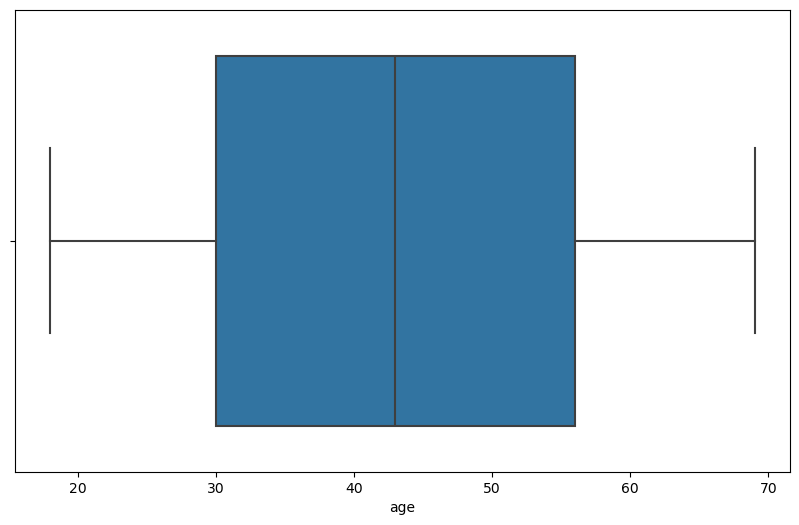

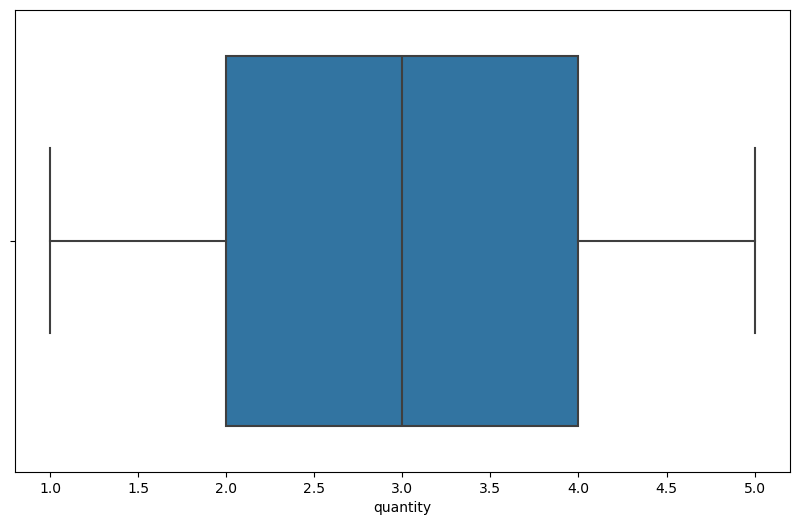

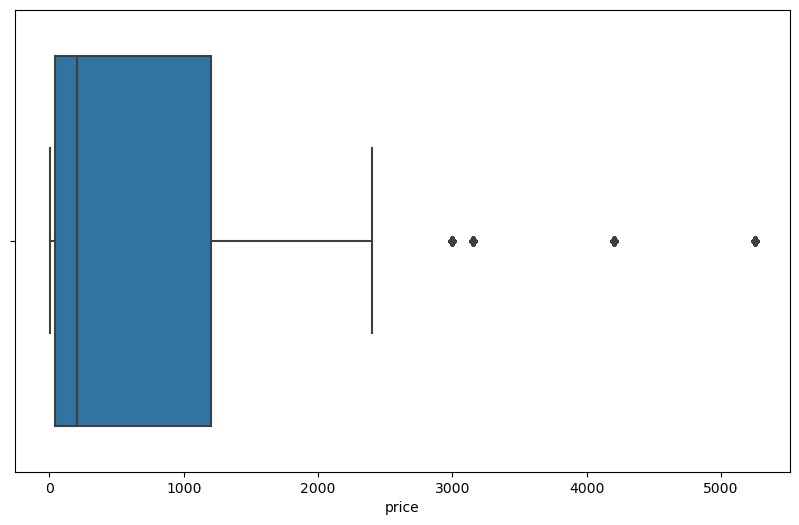

In [33]:
#Cek nilai outliers
df['age'].describe()
# Cek nilai outliers dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])

df['quantity'].describe()
# Cek nilai outliers dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['quantity'])

df['price'].describe()
# Cek nilai outliers dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])



In [34]:
(df['price'] > 5000).sum()  # Cek jumlah data

np.int64(1001)

 Outlier tidak memengaruhi analisis secara signifikan, tidak perlu dihapus.

### Research Question
1. Kategori produk mana yang menghasilkan total pendapatan tertinggi?
2. Shopping mall mana yang memiliki total penjualan tertinggi?
3. Apakah ada tren musiman dalam pembelian?
4. Apakah ada kategori produk yang lebih sering dibeli oleh kelompok usia tertentu?
5. Kelompok usia mana yang paling banyak menghabiskan uang per transaksi?


#### 1. Kategori produk yang menghasilkan total pendapatan tertinggi

In [35]:
#Kategori produk mana yang menghasilkan total pendapatan tertinggi(category, quantity, price)
category_revenue = df.groupby('category').apply(lambda x: (x['quantity'] * x['price']).sum()).reset_index()
category_revenue.columns = ['category', 'total_revenue']

C:\Users\User\AppData\Local\Temp\ipykernel_22160\1344775713.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_revenue = df.groupby('category').apply(lambda x: (x['quantity'] * x['price']).sum()).reset_index()


In [36]:
category_revenue = category_revenue.sort_values(by='total_revenue', ascending=False)
category_revenue

,category,total_revenue
1,Clothing,1.139968e+08
4,Shoes,6.655345e+07
6,Technology,5.786235e+07
2,Cosmetics,6.792863e+06
7,Toys,3.980426e+06
3,Food & Beverage,8.495351e+05
0,Books,8.345529e+05
5,Souvenir,6.358247e+05


In [37]:
df['total_revenue'] = df['quantity'] * df['price']

In [38]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


<Axes: xlabel='category', ylabel='total_revenue'>

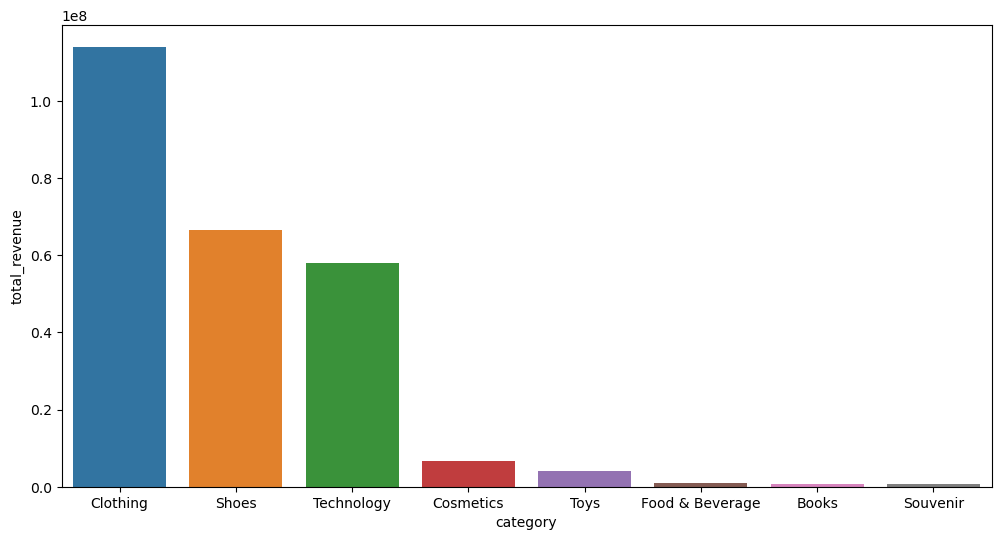

In [39]:
# berikan grafiknya
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_revenue', data=category_revenue)

Clothing mendapatkan pendapatan tertinggi diantara kategori yang lain dengan hasil yang signifikan, disusul dengan sepatu dan teknologi. Tetapi pada kategori yang lain memiliki hasil pendapatan yang rendah.

#### 2. Shopping mall yang memiliki total penjualan tertinggi

In [40]:
# Shopping mall yang memiliki total penjualan tertinggi (shopping_mall, total_revenue)
mall_revenue = df.groupby('shopping_mall')['total_revenue'].sum().reset_index()
mall_revenue = mall_revenue.sort_values(by='total_revenue', ascending=False)


In [41]:
mall_revenue.head()

,shopping_mall,total_revenue
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68


<Axes: xlabel='shopping_mall', ylabel='total_revenue'>

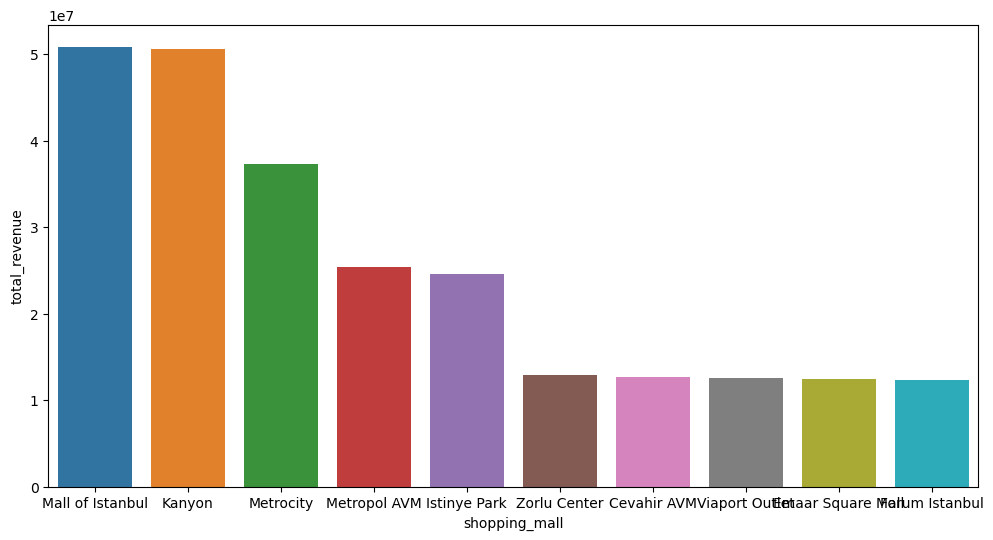

In [42]:
# buatkan grafiknya
plt.figure(figsize=(12, 6))
sns.barplot(x='shopping_mall', y='total_revenue', data=mall_revenue)

Mall yag memiliki penjualan tertinggi ada pada Mall of Istanbul dan Kanyon dengan hasil yang sama, kemudian disusul dengan Metrocity.

#### 3. Tren musiman dalam pembelian

In [43]:
# Tren musiman dalam pembelian
# Buat kolom baru untuk bulan dan tahun
df['month_year'] = df['invoice_date'].dt.to_period('M')
# melihat ada berapa bulan dan tahun yang ada
df['month_year'].unique() 


<PeriodArray>
['2022-08', '2021-12', '2021-11', '2021-05', '2021-10', '2022-05', '2022-03',
 '2021-01', '2021-08', '2022-12', '2022-10', '2022-07', '2022-11', '2022-06',
 '2022-01', '2021-07', '2023-03', '2023-02', '2022-04', '2021-04', '2022-02',
 '2023-01', '2021-09', '2021-06', '2021-03', '2021-02', '2022-09']
Length: 27, dtype: period[M]

In [44]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,month_year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10


In [45]:
# Membuat DataFrame untuk total pendapatan per bulan ditahun 2021
monthly_revenue = df[df['invoice_date'].dt.year == 2021].groupby('month_year')['total_revenue'].sum().reset_index()
monthly_revenue['month_year'] = monthly_revenue['month_year'].astype(str)

e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month_year', ylabel='total_revenue'>

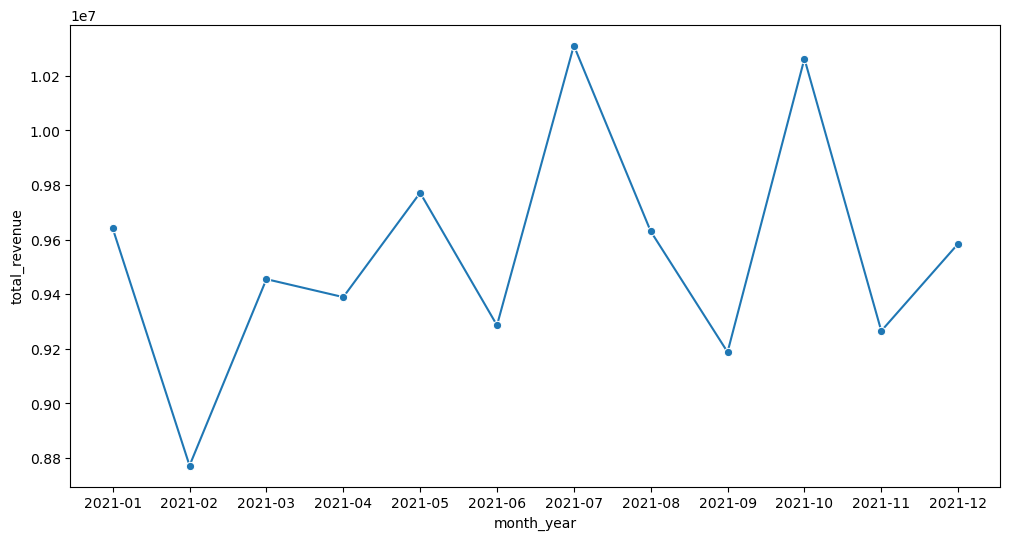

In [46]:
monthly_revenue.head()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_revenue', data=monthly_revenue, marker='o')


Pada timeline 2021 total penjualan tertinggi ada pada bulan juli dan oktober dengan penjualan terendah ada di bulan februari. 

In [47]:
# 2022
monthly_revenue_2022 = df[df['invoice_date'].dt.year == 2022].groupby('month_year')['total_revenue'].sum().reset_index()
monthly_revenue_2022['month_year'] = monthly_revenue_2022['month_year'].astype(str)

e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month_year', ylabel='total_revenue'>

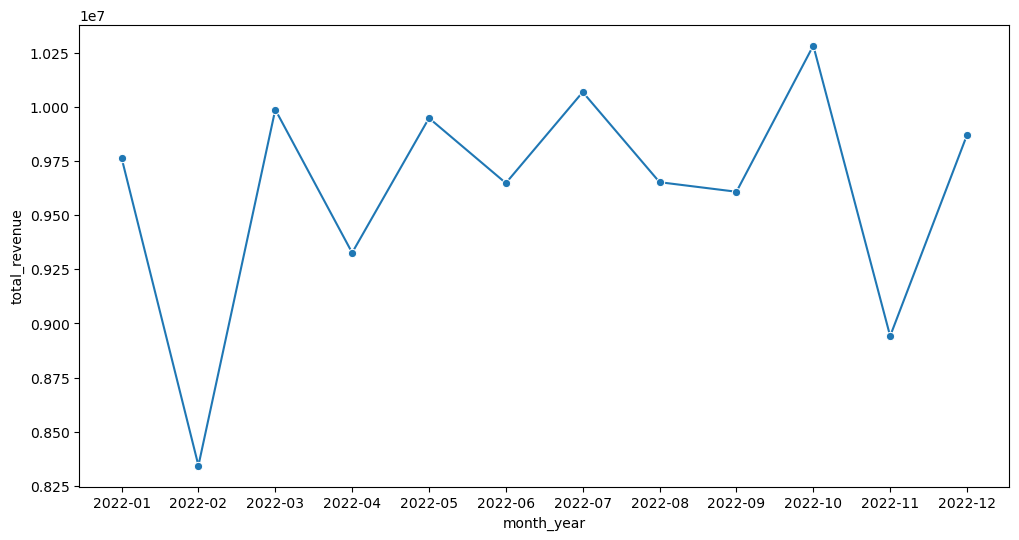

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_revenue', data=monthly_revenue_2022, marker='o')


Pada timeline 2022 penjualan tertinggi ada di bulan oktober dengan penjualan terendah ada di bulan februari juga.

In [49]:
# 2023
monthly_revenue_2023 = df[df['invoice_date'].dt.year == 2023].groupby('month_year')['total_revenue'].sum().reset_index()
monthly_revenue_2023['month_year'] = monthly_revenue_2023['month_year'].astype(str)
monthly_revenue_2023 = monthly_revenue_2023[monthly_revenue_2023['month_year'] != '2023-03'].reset_index(drop=True)

e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month_year', ylabel='total_revenue'>

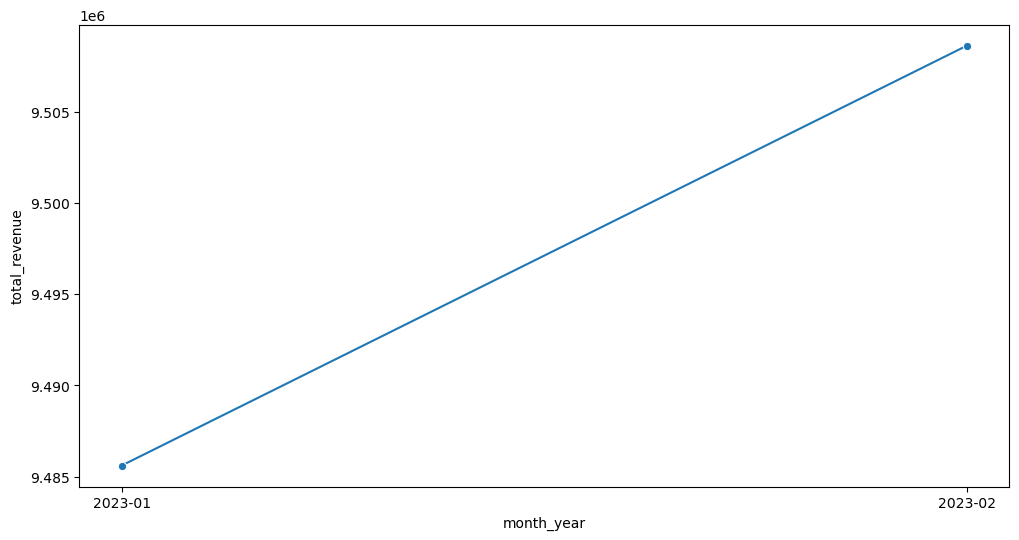

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_revenue', data=monthly_revenue_2023, marker='o')

karena data yang ada di tahun 2023 tidak lengkap maka tidak digunakan terlebih dahulu

e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='month_year', ylabel='total_revenue'>

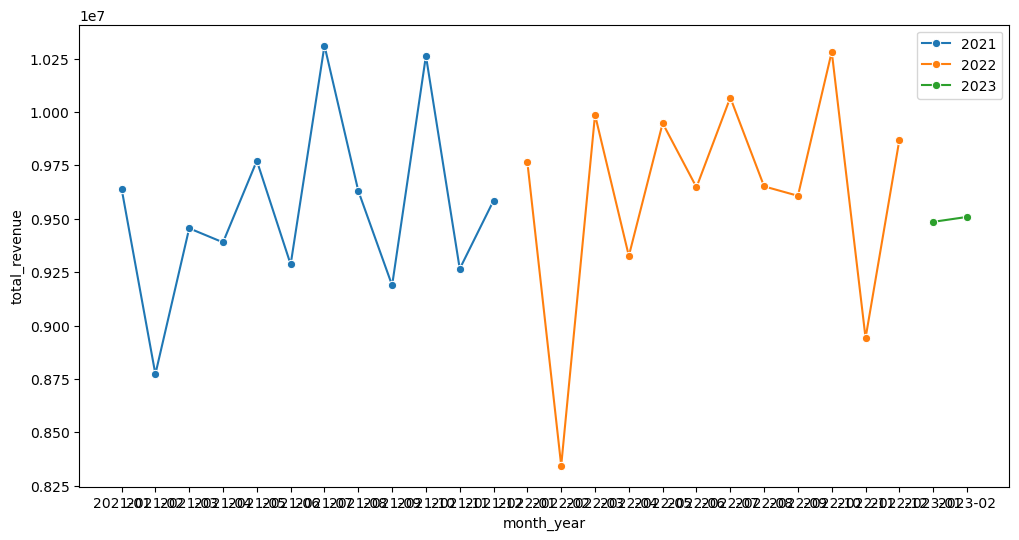

In [51]:
# buat grafik untuk semua tahun 
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_revenue', data=monthly_revenue, marker='o', label='2021')
sns.lineplot(x='month_year', y='total_revenue', data=monthly_revenue_2022, marker='o', label='2022')
sns.lineplot(x='month_year', y='total_revenue', data=monthly_revenue_2023, marker='o', label='2023')


e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\software\Anaconda\Data\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


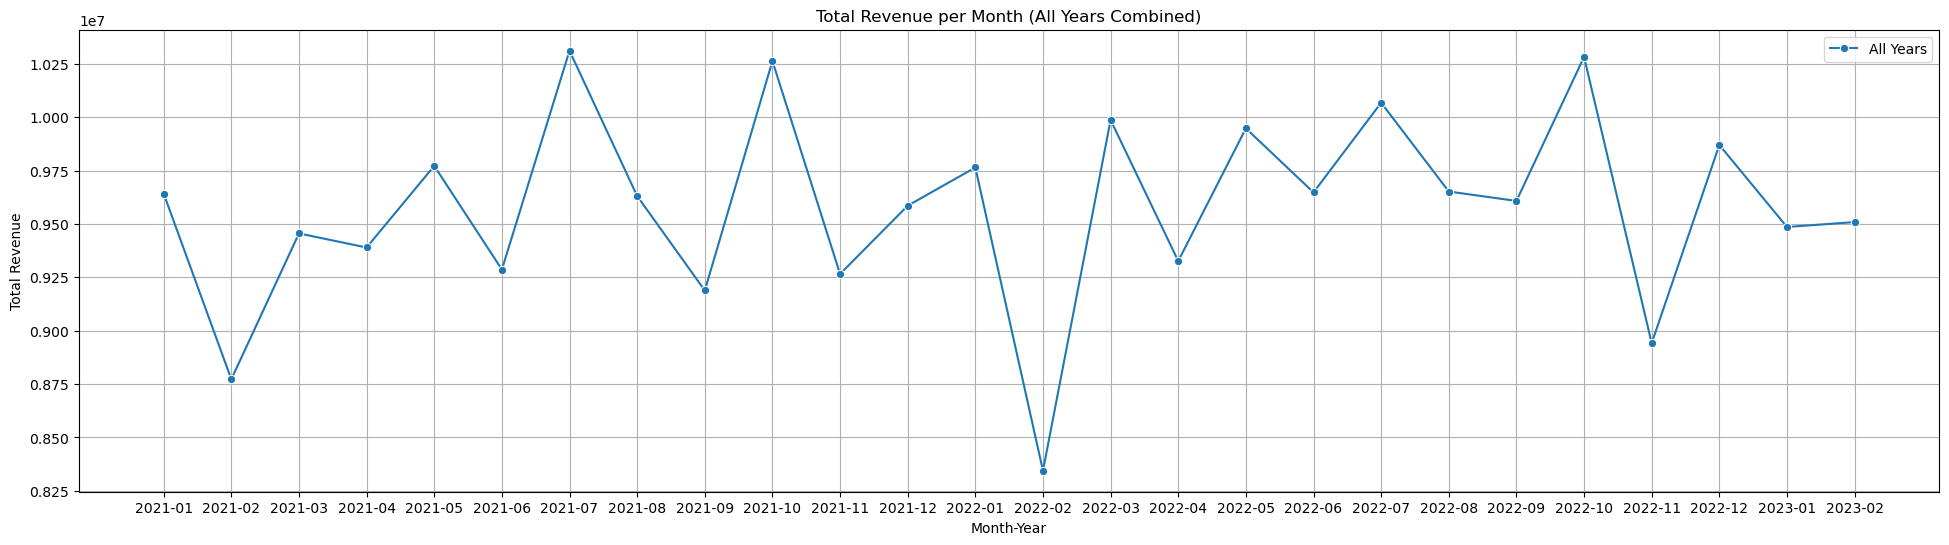

In [52]:
# Tren penjualan secara kesulurahan
all_monthly_revenue = pd.concat([
  monthly_revenue.assign(year='2021'),
  monthly_revenue_2022.assign(year='2022'),
  monthly_revenue_2023.assign(year='2023')
])
plt.figure(figsize=(24, 6))
sns.lineplot(x='month_year', y='total_revenue', data=all_monthly_revenue, marker='o', label='All Years')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Month (All Years Combined)')
plt.legend()
plt.grid(True)


Ditahun 2021 penjualan mengalami kenaikan signifikan di bulan juli dan oktober saja, sedangkan ditahun 2022 penjualan mengalami penurunan yang cukup drastis di bulan februari dengan kenikan penjualan yang signifikan di bulan maret. Kemudian pada tahun 2022 penjualan cukup stabil dengan tren naik.  
Tren penjualan di tahun 2021 dan 2022 hampir sama dengan penjulan terendah di bulan februari dan penjualan tinggi dibulan juli dan oktober, dengan penurunan lagi dibulan november.

#### 4. Apakah ada kategori produk yang lebih sering dibeli oleh kelompok usia tertentu?

C:\Users\User\AppData\Local\Temp\ipykernel_22160\4276195182.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_quantity = df.groupby(['age_group', 'category'])['quantity'].sum().reset_index()
e:\software\Anaconda\Data\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
e:\software\Anaconda\Data\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True t

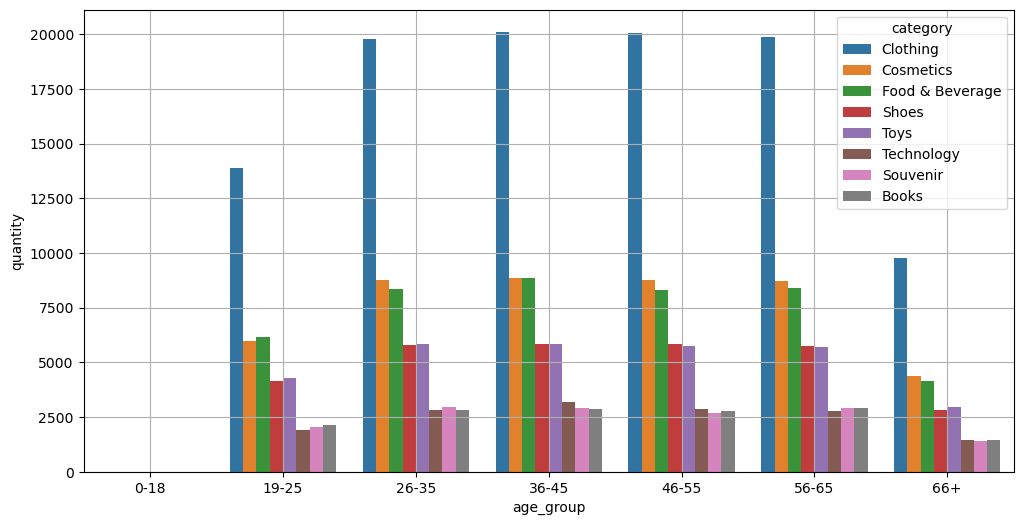

In [53]:
# kategori produk yang lebih sering dibeli oleh kelompok usia tertentu(age, category,quantity)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_category_quantity = df.groupby(['age_group', 'category'])['quantity'].sum().reset_index()
age_category_quantity = age_category_quantity.sort_values(by='quantity', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='quantity', hue='category', data=age_category_quantity)
plt.grid(True)



kategori pakaian masih memiliki peminat tertinggi di semua kalangan disusul kosmetik dan makanan. Kemudian untuk kategori yang lain juga hampir sama disemua kalangan, jadi tidak ada kategori produk yang dibeli diusia tertentu.

In [54]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,month_year,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,26-35
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,19-25
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,19-25
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,66+
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,46-55


### 5. Kelompok usia yang paling banyak menghabiskan uang per transaksi

In [55]:
# Kelompok usia mana yang paling banyak menghabiskan uang per transaksi?
age_spending = df.groupby('age_group')['total_revenue'].mean().reset_index()
age_spending = age_spending.sort_values(by='total_revenue', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_22160\384735036.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby('age_group')['total_revenue'].mean().reset_index()


e:\software\Anaconda\Data\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


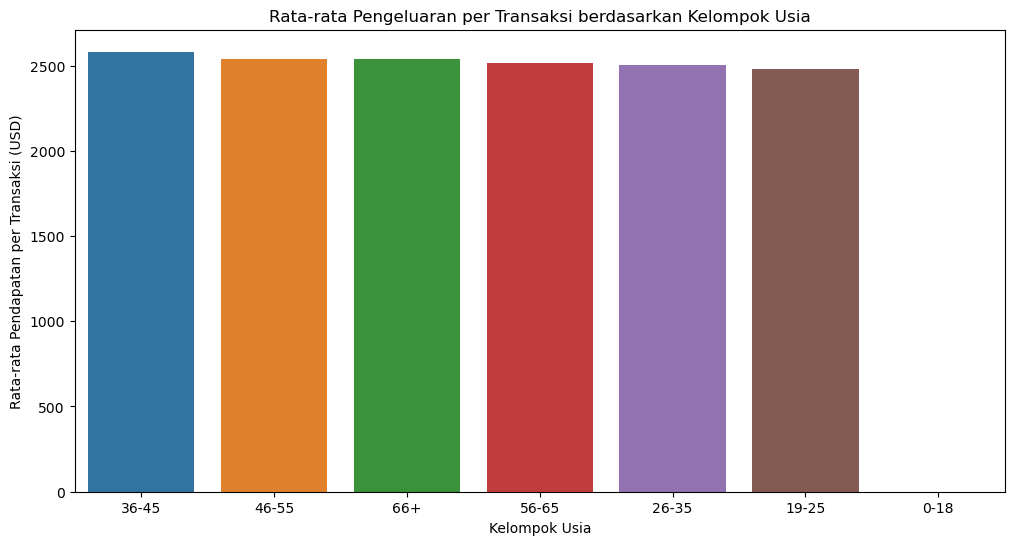

In [57]:
# Ambil urutan kelompok usia dari DataFrame yang sudah diurutkan
order = age_spending['age_group']

# Buat visualisasi bar plot dengan urutan yang sudah ditentukan
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='total_revenue', data=age_spending, order=order)
plt.title('Rata-rata Pengeluaran per Transaksi berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Pendapatan per Transaksi (USD)')
plt.show()

Rata rata pengluaran per transaksi di semua kalngan memiliki hasil yang hampir sama, kecuali pada rentang usial 0-18 tahun. Tetapi tetap rata rata pengluaran per transaksi paling tinggi ada di usia 36-45 dengan per transaksi bisa lebih 2500 USD.

### Rekomendasi
1. Untuk ..